# Opera Network Visualization

### By Gianluca Coletta & Tommaso Martinelli

In questo progetto è stata realizzata una visualizzazione dell'informazione relativa al dataset [Opera Network](http://mozart.diei.unipg.it/gdcontest/contest2022/topics.html).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pandas as pd
from geopy.geocoders import Nominatim
import geojson
import folium
from folium.plugins import MarkerCluster
import squarify 
import matplotlib
from collections import Counter
from networkx.drawing.layout import bipartite_layout
import json
from pyvis.network import Network
from IPython.core.display import HTML

In [2]:
filepath = "opera-network.csv"
data = pd.read_csv(filepath)
data.drop("rism_id",axis=1,inplace=True)
data.head()

,composer,librettist,title,performance_year,placename
0,"Paisiello, Giovanni","Metastasio, Pietro",Achille in Sciro,1778,Sankt Petersburg
1,"Mayr, Johann Simon","Rossi, Gaetano",Adelaide di Guesclino,1799,Venezia
2,"Mayr, Johann Simon","Rossi, Gaetano",Adelaide di Guesclino,1808,Dresden
3,"Mayr, Johann Simon","Rossi, Gaetano",Adelaide di Guesclino,1815,Hamburg
4,"Anfossi, Pasquale","Metastasio, Pietro",Adriano in Siria,1777,Padova


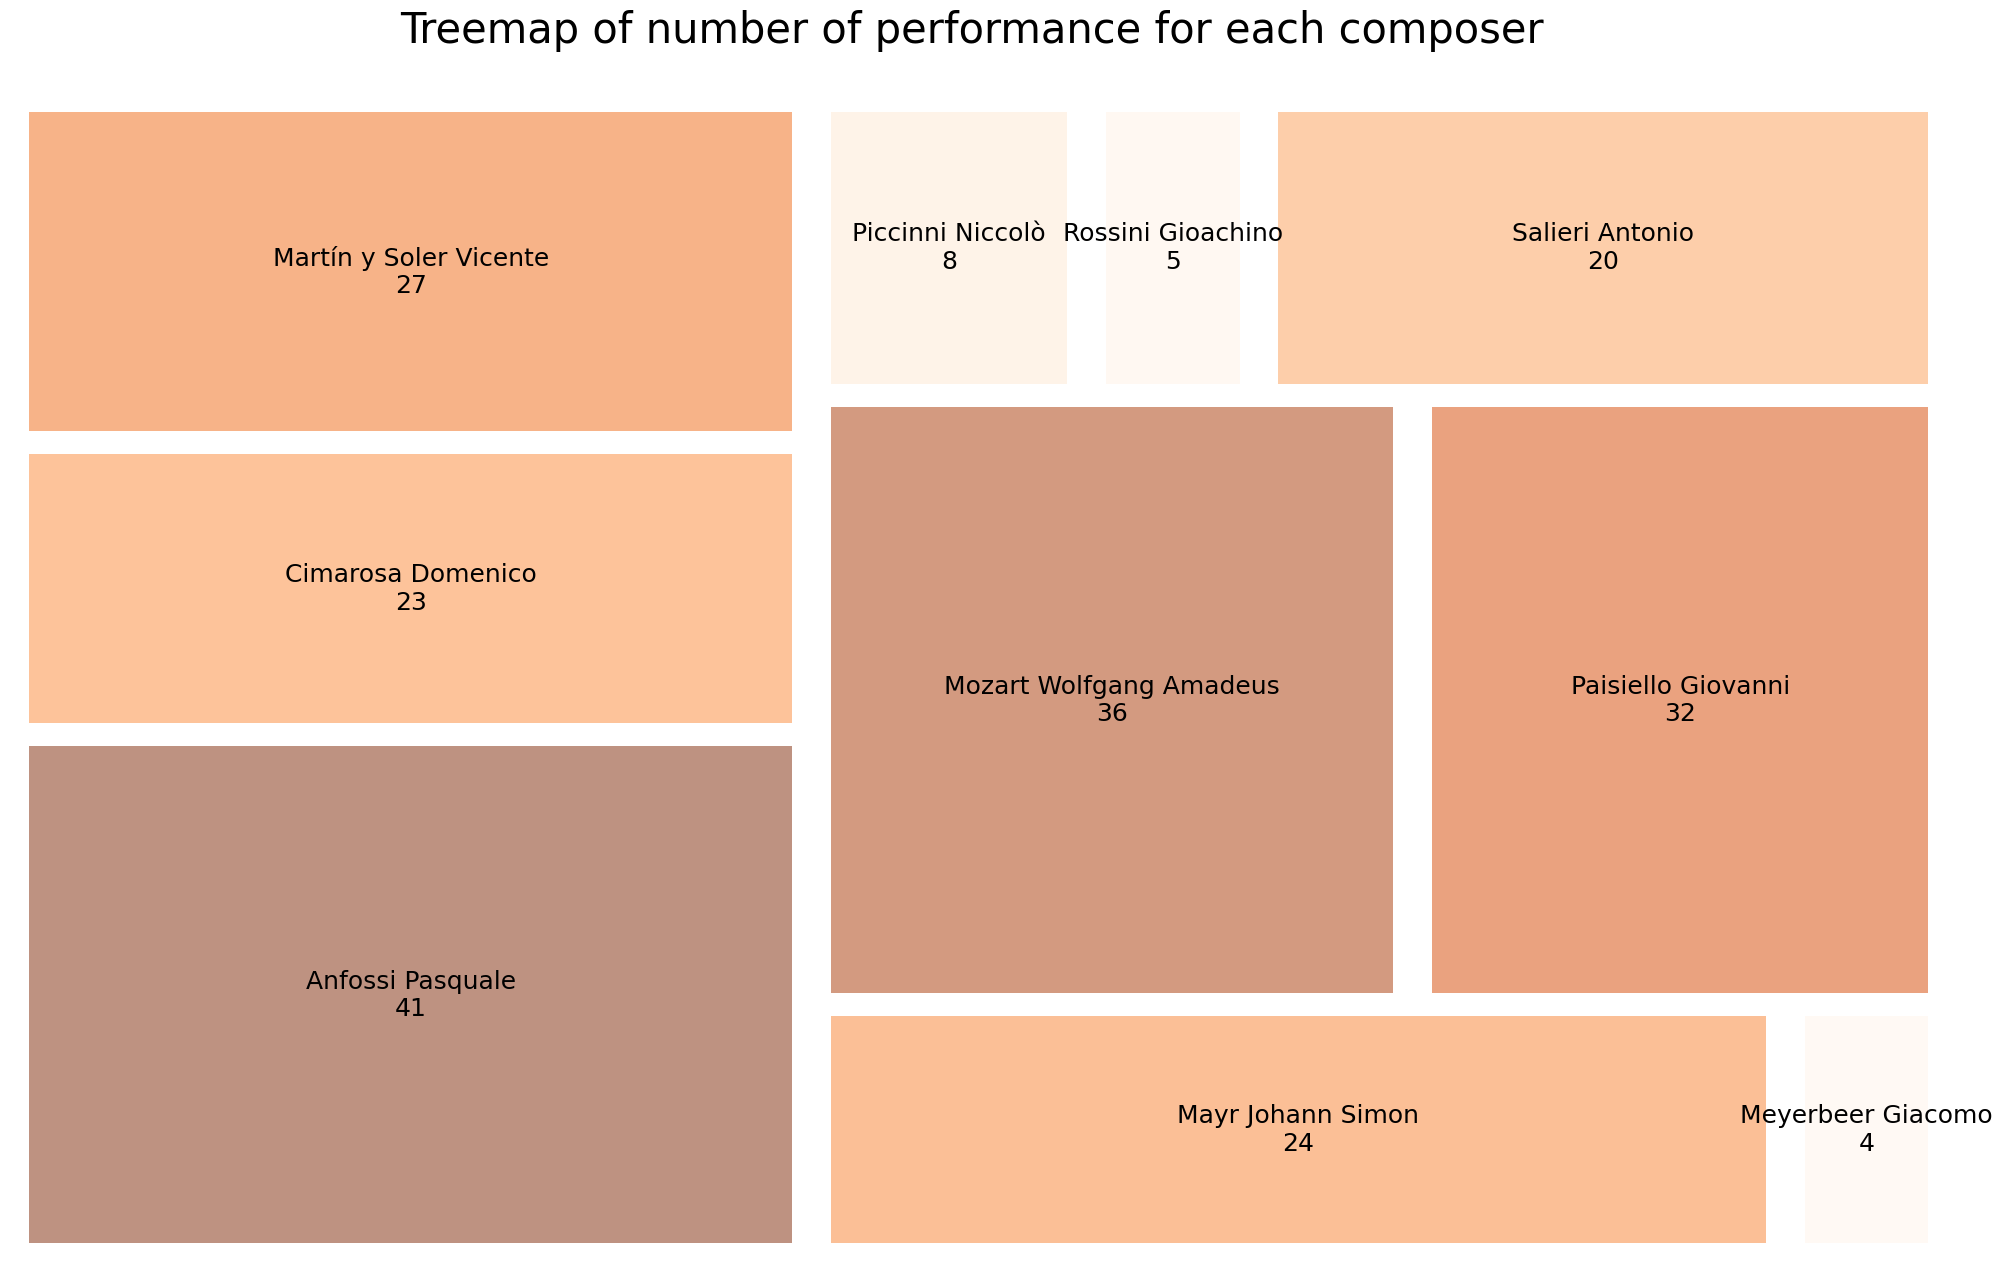

In [3]:
#Composer Treemap
data['composer'] = data['composer'].str.replace(",","")
df_grouped = data.groupby('composer').count()[['title']]
df_grouped = df_grouped.rename(columns={'title': 'number of performance'})

df_grouped.reset_index(inplace=True)

# Label and sizes
d = df_grouped['number of performance']
df_grouped["label"] = df_grouped['composer'].astype(str) +"\n"+ df_grouped["number of performance"].astype(str)
a = df_grouped['label']

# color
cmap = matplotlib.cm.Oranges
mini=min(d)
maxi=max(d)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in d]

# Treemap plot
figure = plt.figure(figsize=(25,15))
squarify.plot(sizes=d,label=a, alpha=.5, pad=2, text_kwargs={'fontsize':18}, color = colors)
plt.title('Treemap of number of performance for each composer \n', fontdict={'fontsize': 30})
plt.axis('off')
plt.show()

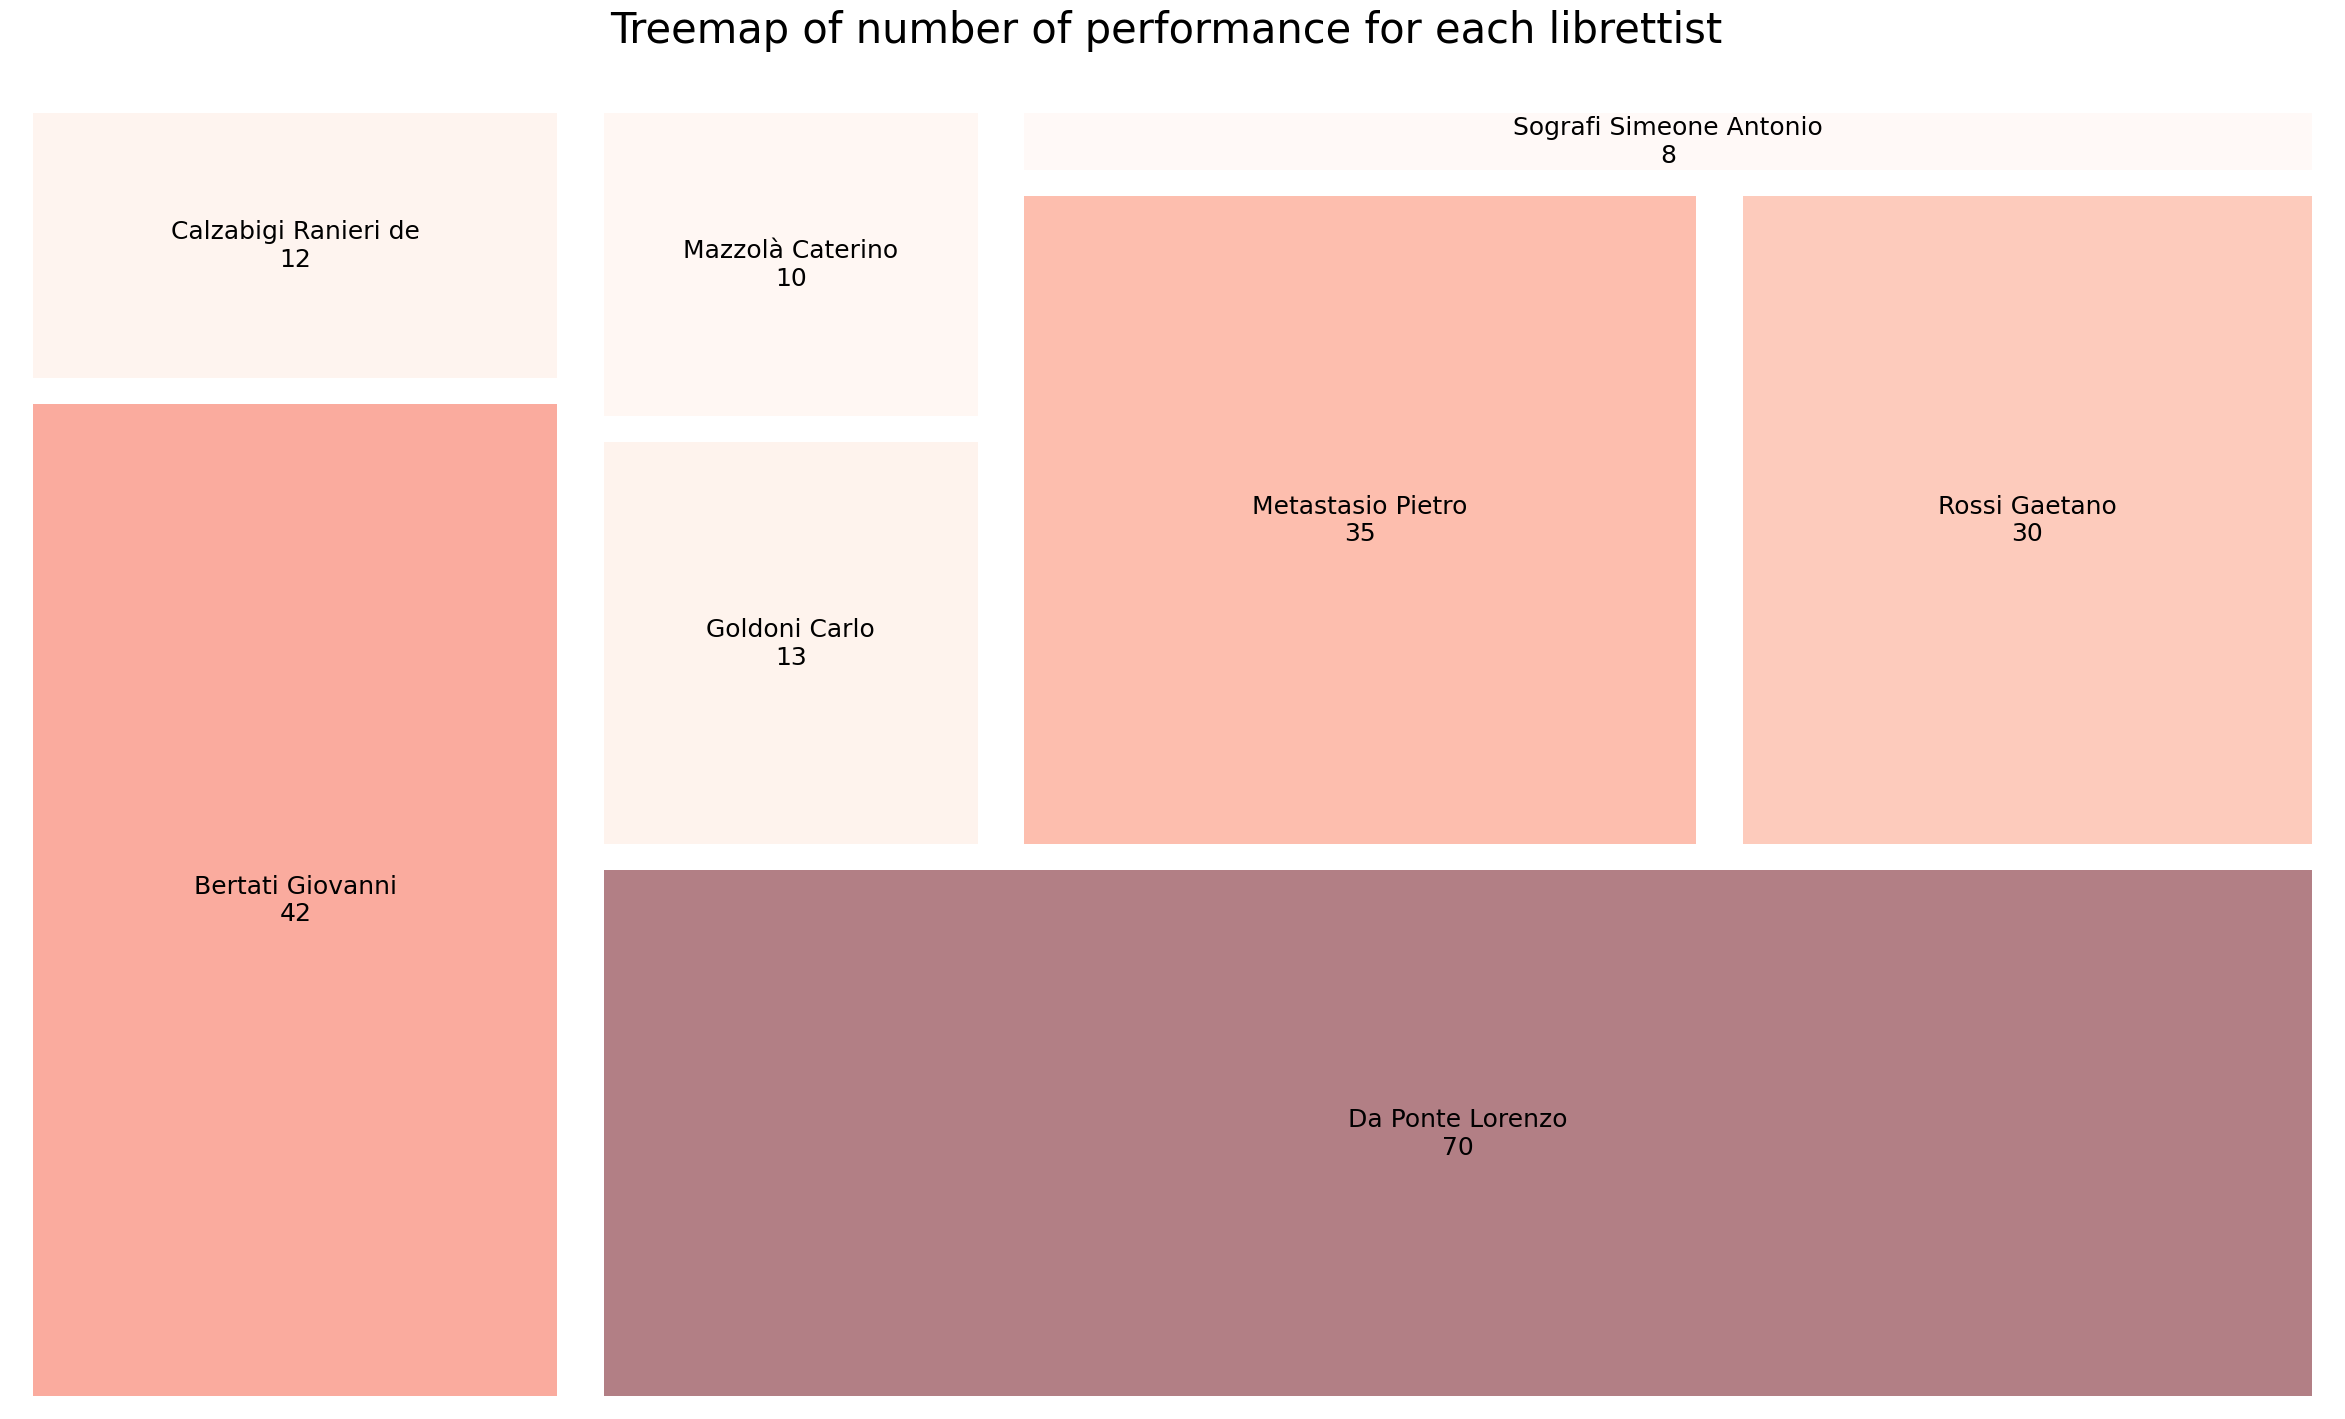

In [4]:
#Librettist Treemap
data['librettist'] = data['librettist'].str.replace(",","")
df_grouped1 = data.groupby('librettist').count()[['title']]
df_grouped1 = df_grouped1.rename(columns={'title': 'number of performance'})
df_grouped1.reset_index(inplace=True)

# Label and sizes
d = df_grouped1['number of performance']
df_grouped1["label"] = df_grouped1['librettist'].astype(str) +"\n"+ df_grouped1["number of performance"].astype(str)
a = df_grouped1['label']

# Colors
cmap = matplotlib.cm.Reds
mini=min(d)
maxi=max(d)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in d]

# Treemap plot
figure = plt.figure(figsize=(30,17))
squarify.plot(sizes=d,label=a, alpha=.5, pad=2, text_kwargs={'fontsize':18}, color = colors)
plt.title('Treemap of number of performance for each librettist \n', fontdict={'fontsize': 30})
plt.axis('off')
plt.show()

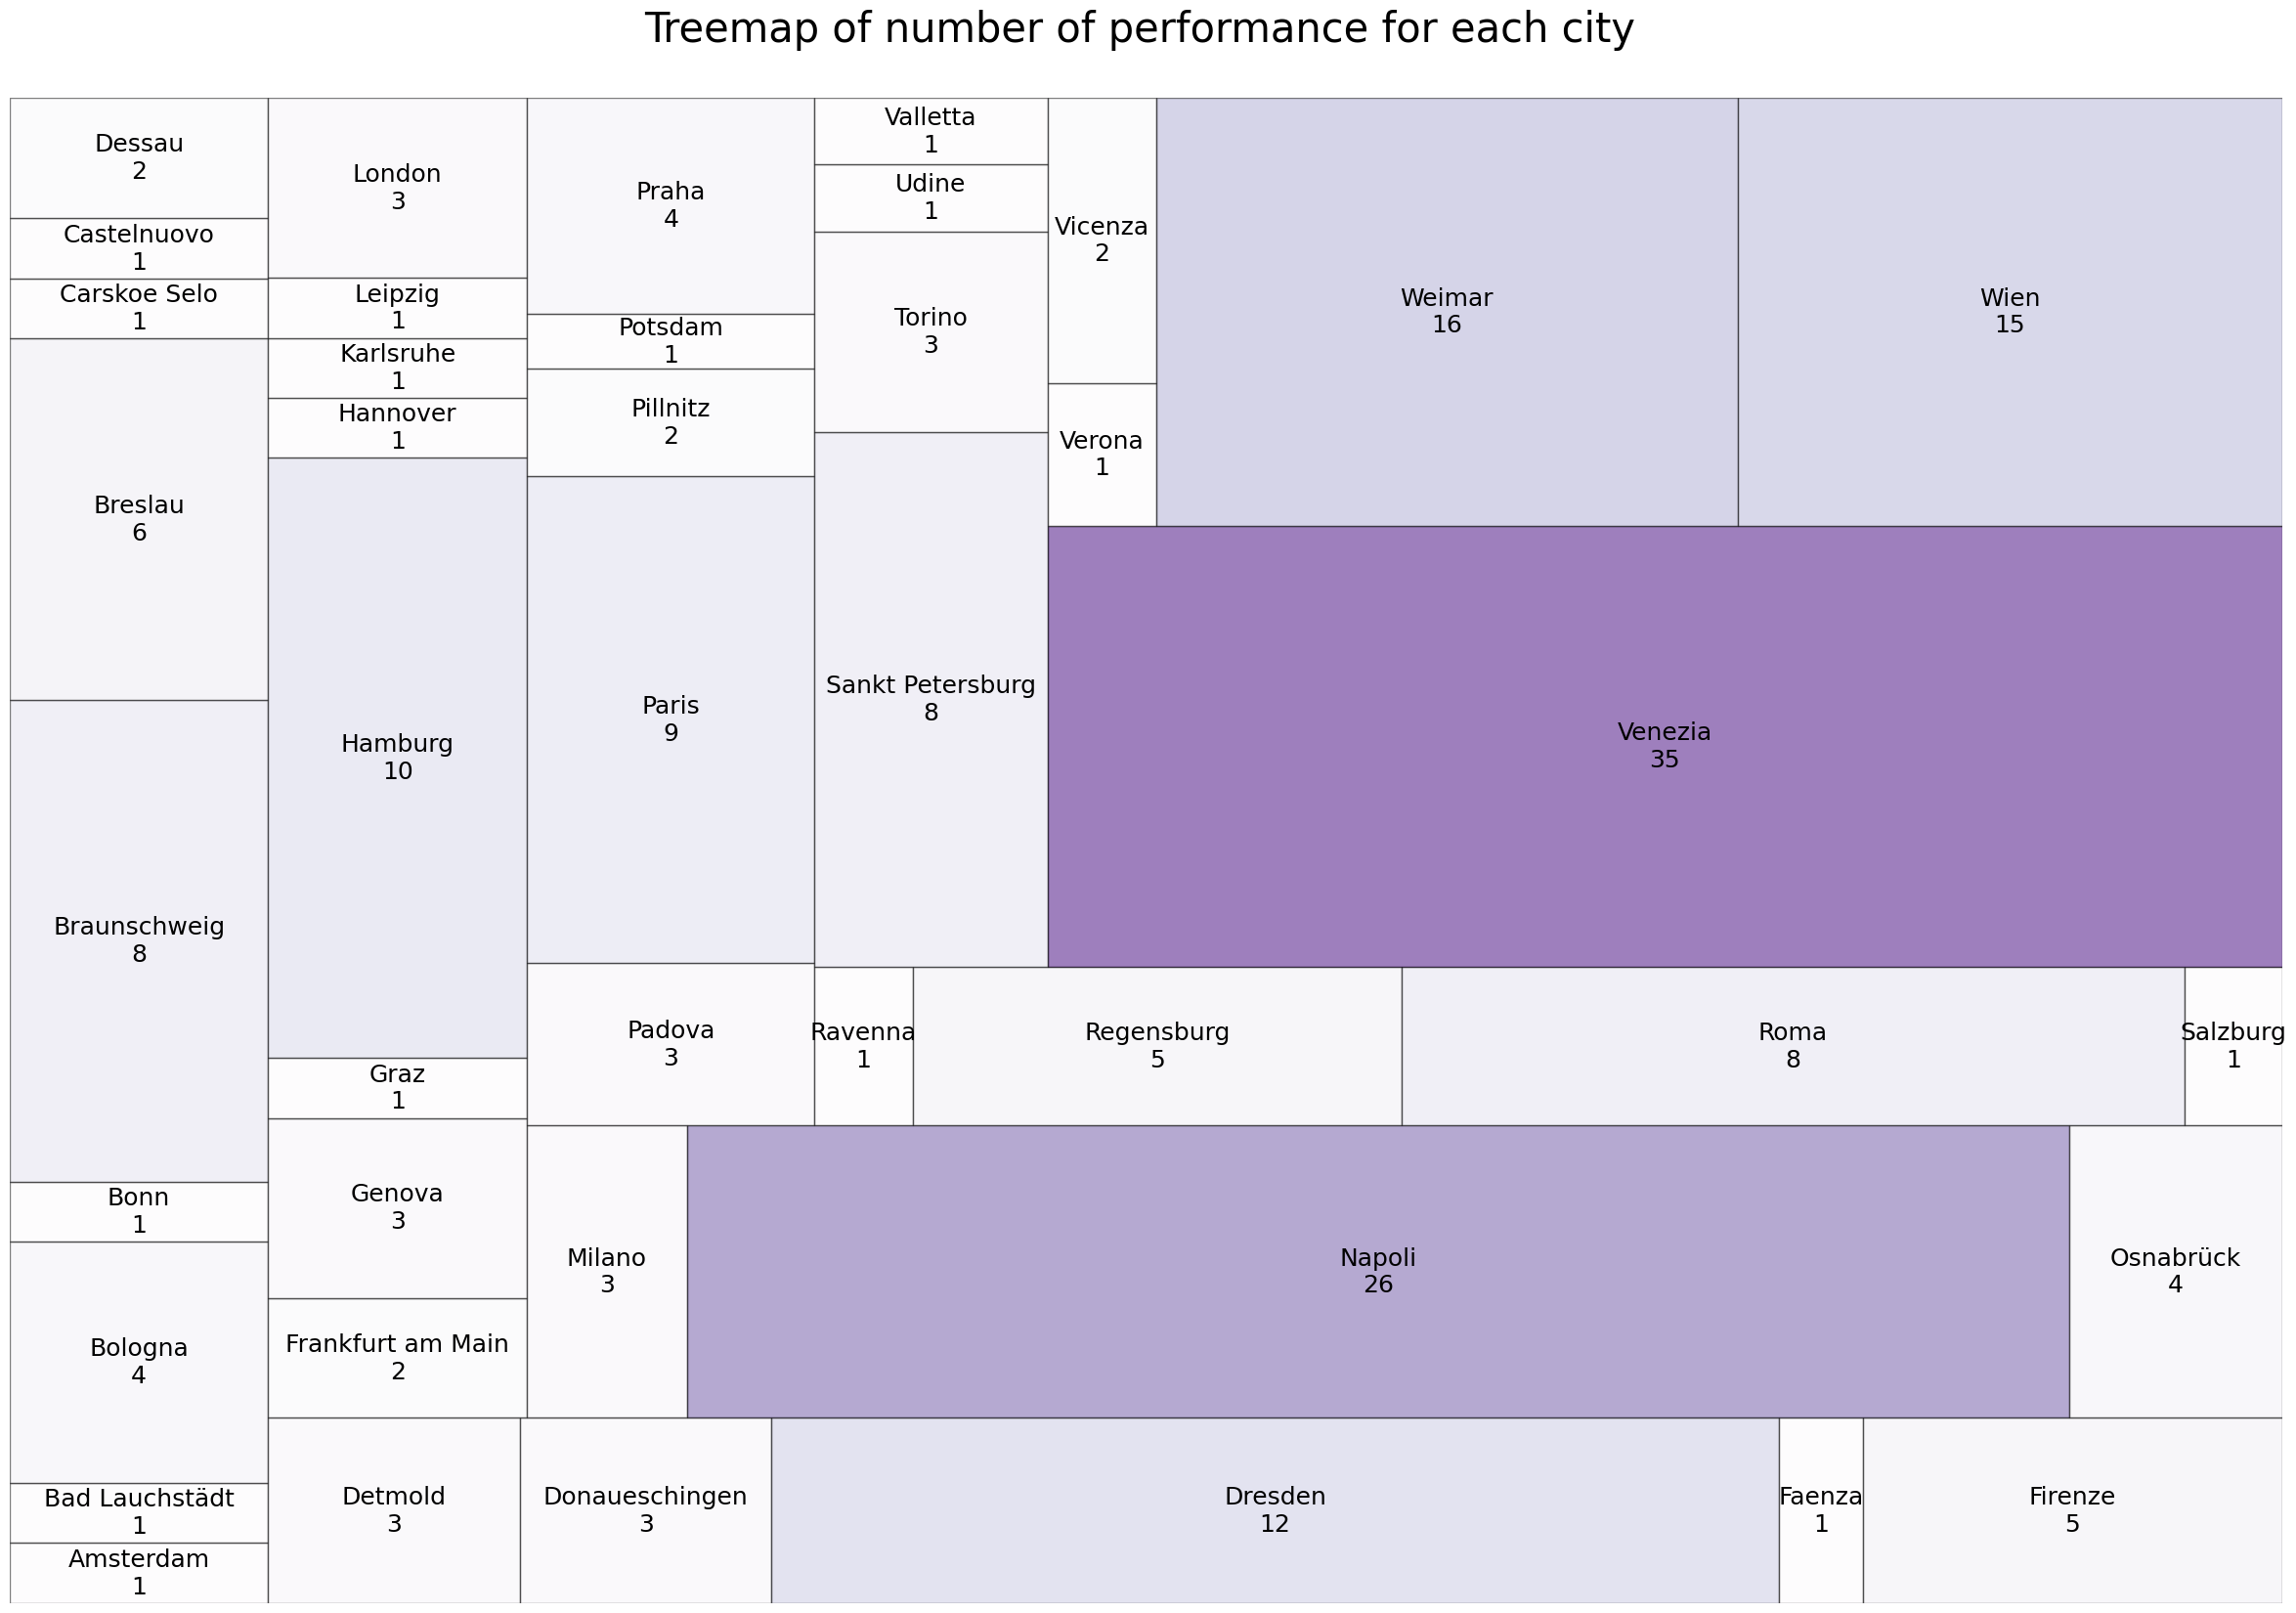

In [5]:
#Title Treemap
df_grouped2 = data.groupby('placename').count()[['title']]
df_grouped2 = df_grouped2.rename(columns={'title': 'number of performance'})

df_grouped2.reset_index(inplace=True)

 
# Label and sizes
d = df_grouped2['number of performance']
df_grouped2["label"] = df_grouped2['placename'].astype(str) +"\n"+ df_grouped2["number of performance"].astype(str)
a = df_grouped2['label']

# Colors
cmap = matplotlib.cm.Purples
mini=min(d)
maxi=max(d)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in d]

# Treemap plot
figure = plt.figure(figsize=(30,20))
squarify.plot(sizes=d,label=a, alpha=.5, text_kwargs={'fontsize':18}, color = colors, bar_kwargs=dict(linewidth=1, edgecolor="#000000"))
plt.title('Treemap of number of performance for each city \n', fontdict={'fontsize': 30})
plt.axis('off')
plt.show()

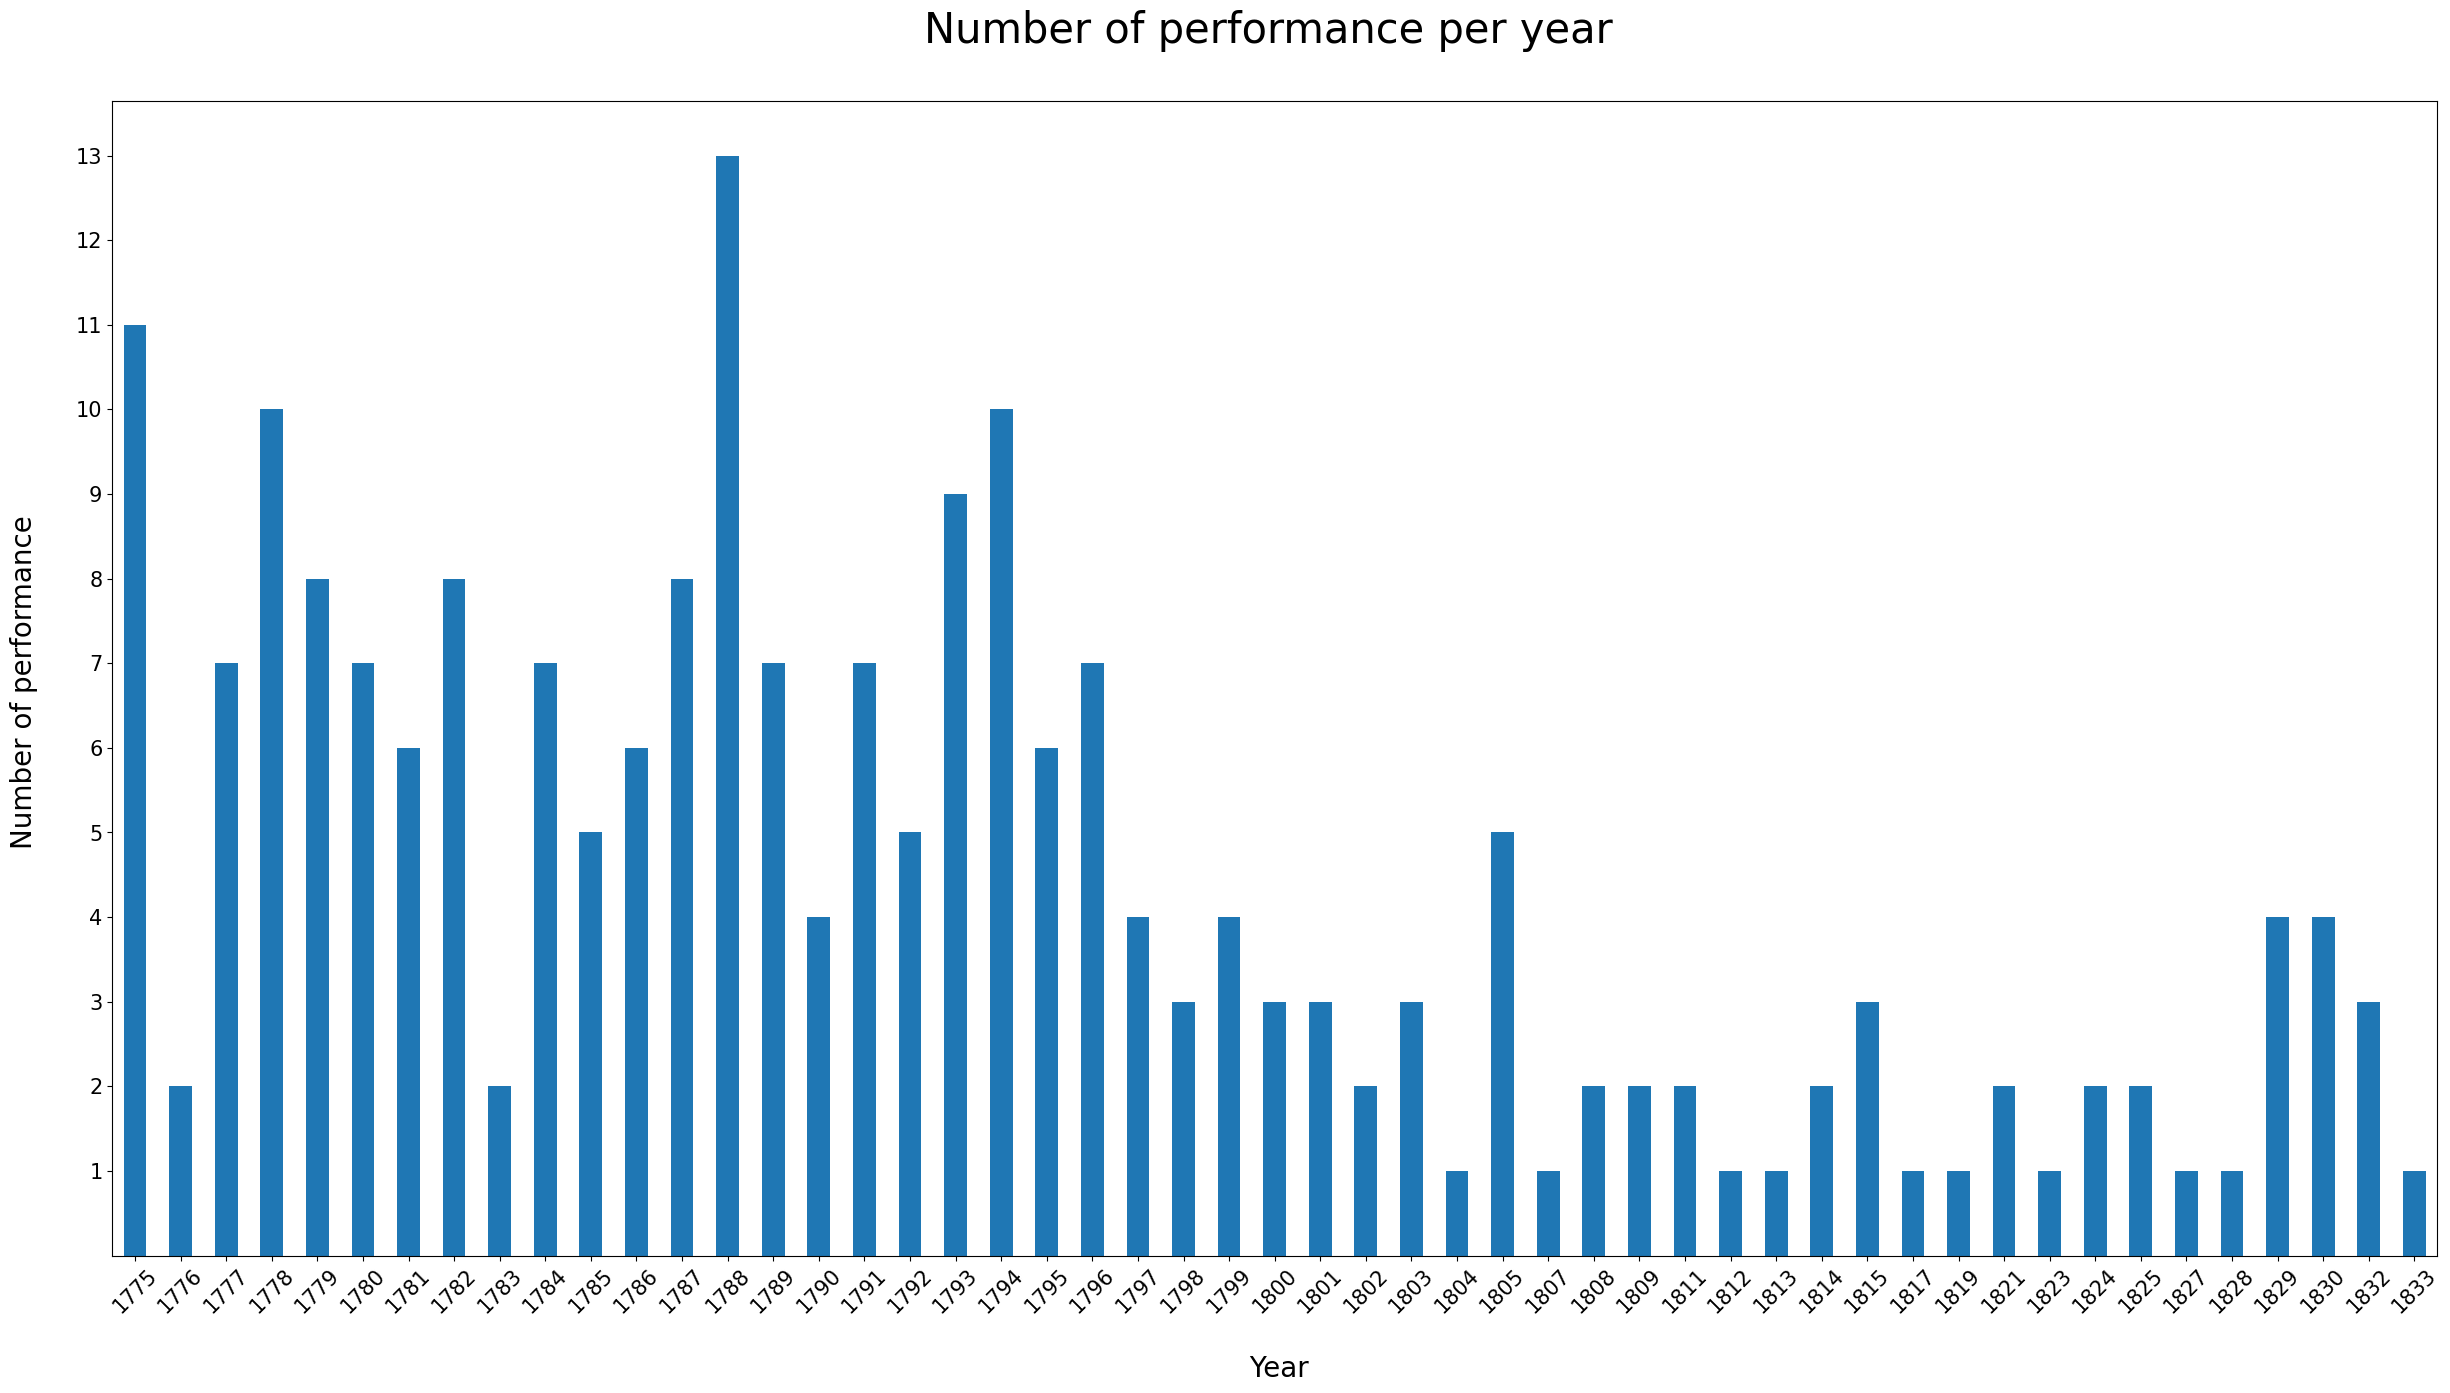

In [6]:
#performance per year visualization
performance_year = data.groupby('performance_year').size()

plt.figure(figsize=(30, 15))

performance_year.plot(kind='bar')

plt.xticks(rotation=45)
plt.yticks(np.arange(min(performance_year), max(performance_year)+1, 1))

plt.setp(plt.gca().get_xticklabels(), fontsize=15)
plt.setp(plt.gca().get_yticklabels(), fontsize=15)

plt.title('Number of performance per year \n',fontdict={'fontsize': 30})
plt.xlabel('\n Year', fontdict={'fontsize': 20})
plt.ylabel('Number of performance \n', fontdict={'fontsize': 20})

plt.show()

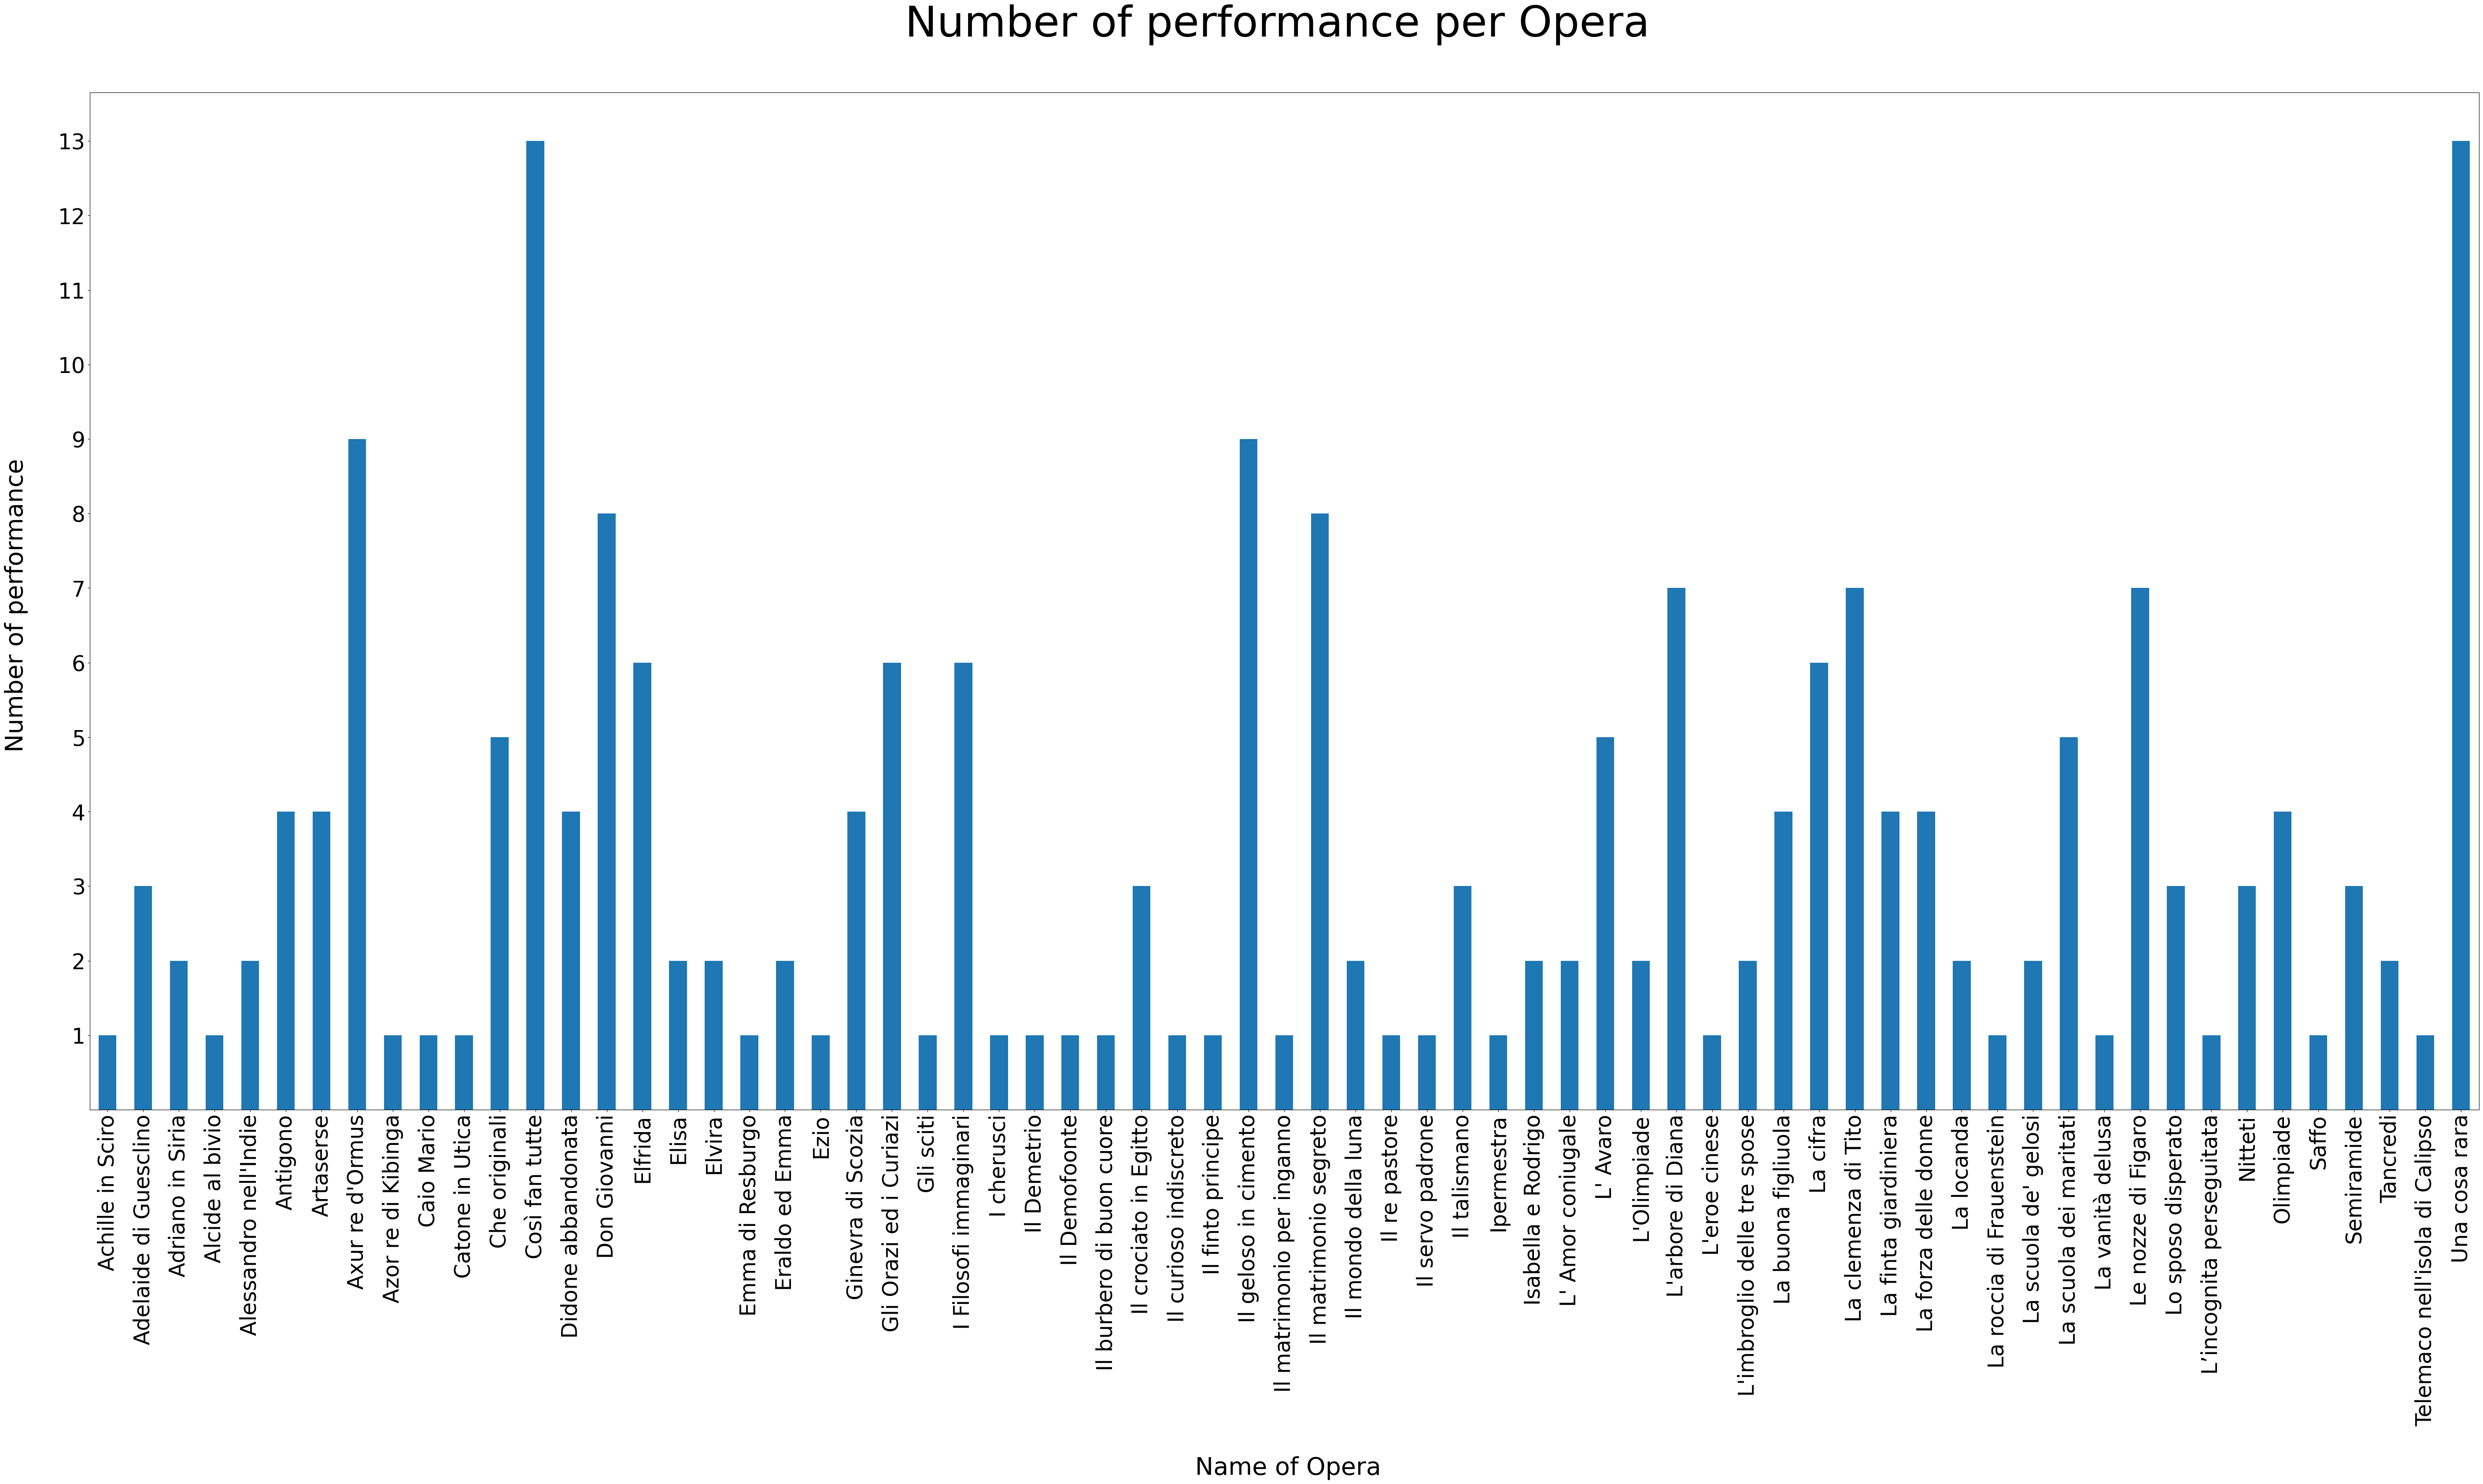

In [7]:
#Title visualization
title = data.groupby('title').size()

plt.figure(figsize=(70, 30))

# crea un grafico a barre
title.plot(kind='bar')

plt.yticks(np.arange(min(title), max(title)+1, 1))

plt.setp(plt.gca().get_xticklabels(), fontsize=35)
plt.setp(plt.gca().get_yticklabels(), fontsize=35)

plt.title('Number of performance per Opera \n',fontdict={'fontsize': 70})
plt.xlabel('\n Name of Opera', fontdict={'fontsize': 40})
plt.ylabel('Number of performance \n', fontdict={'fontsize': 40})

plt.show()

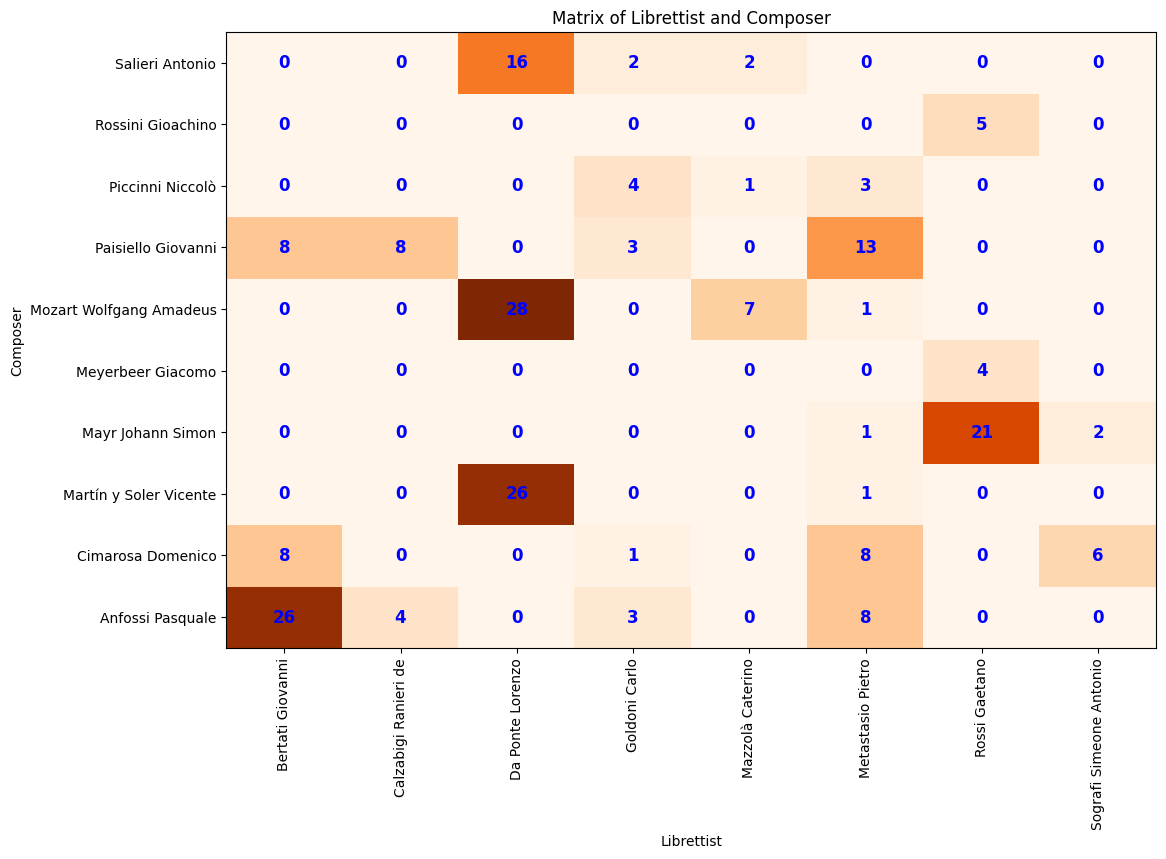

In [8]:
grouped_data = data.groupby(by=['librettist','composer'])
counts = grouped_data.size().reset_index(name='counts')
matrix = counts.pivot_table(values='counts', index='composer', columns='librettist', fill_value=0)
plt.figure(figsize=(12, 8))
plt.title("Matrix of Librettist and Composer")
plt.xlabel("Librettist")
plt.ylabel("Composer")
plt.pcolor(matrix, cmap='Oranges')
for y in range(matrix.shape[0]):
    for x in range(matrix.shape[1]):
        plt.text(x + 0.5, y + 0.5, matrix.iloc[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 fontweight='bold',
                 fontsize=12,
                 color='blue')

plt.yticks(np.arange(0.5, len(matrix.index), 1), matrix.index)
plt.xticks(np.arange(0.5, len(matrix.columns), 1), matrix.columns,rotation=90)
plt.show()

          placename                 composer  counts
0         Amsterdam  Mozart Wolfgang Amadeus       1
1    Bad Lauchstädt          Salieri Antonio       1
2           Bologna         Anfossi Pasquale       2
3           Bologna   Martín y Soler Vicente       1
4           Bologna       Paisiello Giovanni       1
..              ...                      ...     ...
102            Wien        Cimarosa Domenico       1
103            Wien   Martín y Soler Vicente       6
104            Wien        Mayr Johann Simon       1
105            Wien  Mozart Wolfgang Amadeus       3
106            Wien          Salieri Antonio       4

[107 rows x 3 columns]


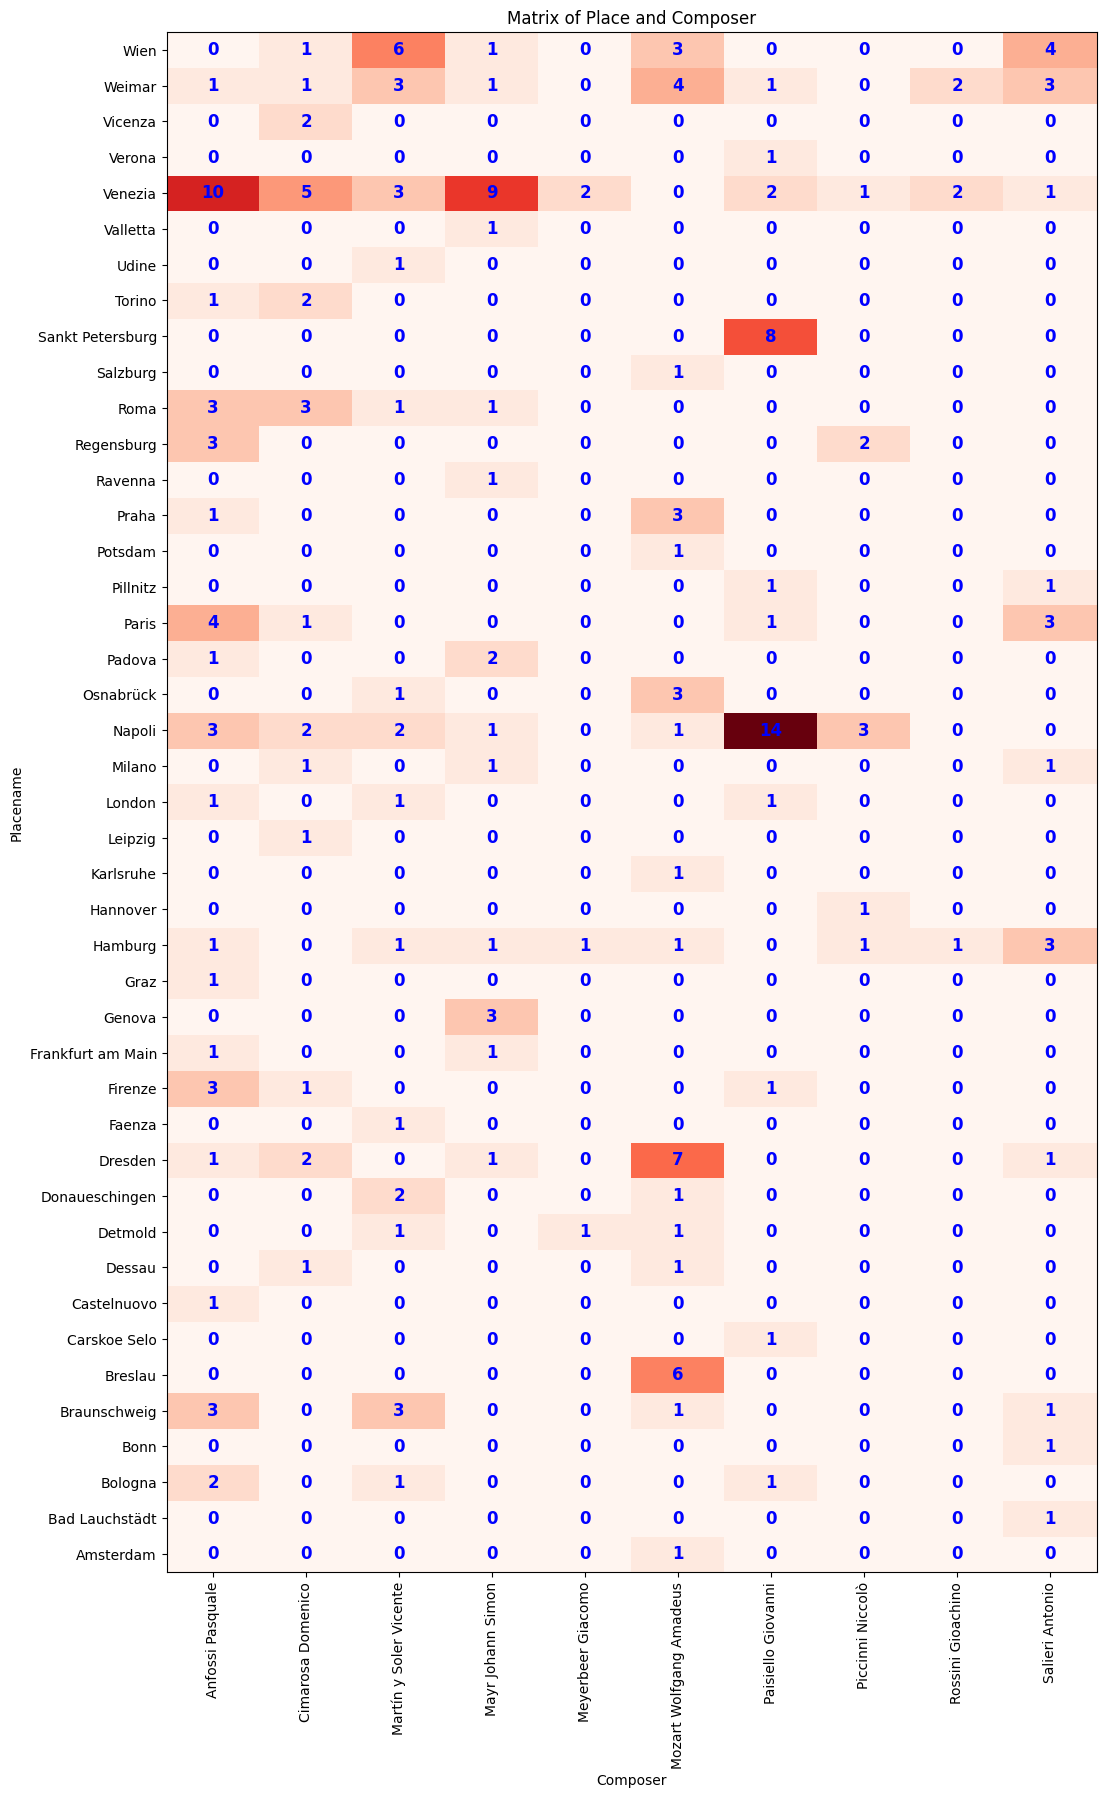

In [9]:
grouped_data = data.groupby(by=['placename','composer'])
counts = grouped_data.size().reset_index(name='counts')
print(counts)
matrix = counts.pivot_table(values='counts', index='placename', columns='composer', fill_value=0)
plt.figure(figsize=(12, 20))
plt.title("Matrix of Place and Composer")
plt.xlabel("Composer")
plt.ylabel("Placename")
plt.pcolor(matrix, cmap='Reds')
for y in range(matrix.shape[0]):
    for x in range(matrix.shape[1]):
        plt.text(x + 0.5, y + 0.5, matrix.iloc[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 fontweight='bold',
                 fontsize=12,
                 color='blue')

plt.yticks(np.arange(0.5, len(matrix.index), 1), matrix.index)
plt.xticks(np.arange(0.5, len(matrix.columns), 1), matrix.columns,rotation=90)
plt.show()

         placename            librettist  counts
0        Amsterdam      Da Ponte Lorenzo       1
1   Bad Lauchstädt      Da Ponte Lorenzo       1
2          Bologna      Bertati Giovanni       1
3          Bologna  Calzabigi Ranieri de       1
4          Bologna      Da Ponte Lorenzo       1
..             ...                   ...     ...
89          Weimar      Mazzolà Caterino       1
90          Weimar         Rossi Gaetano       3
91            Wien      Bertati Giovanni       1
92            Wien      Da Ponte Lorenzo      13
93            Wien         Rossi Gaetano       1

[94 rows x 3 columns]


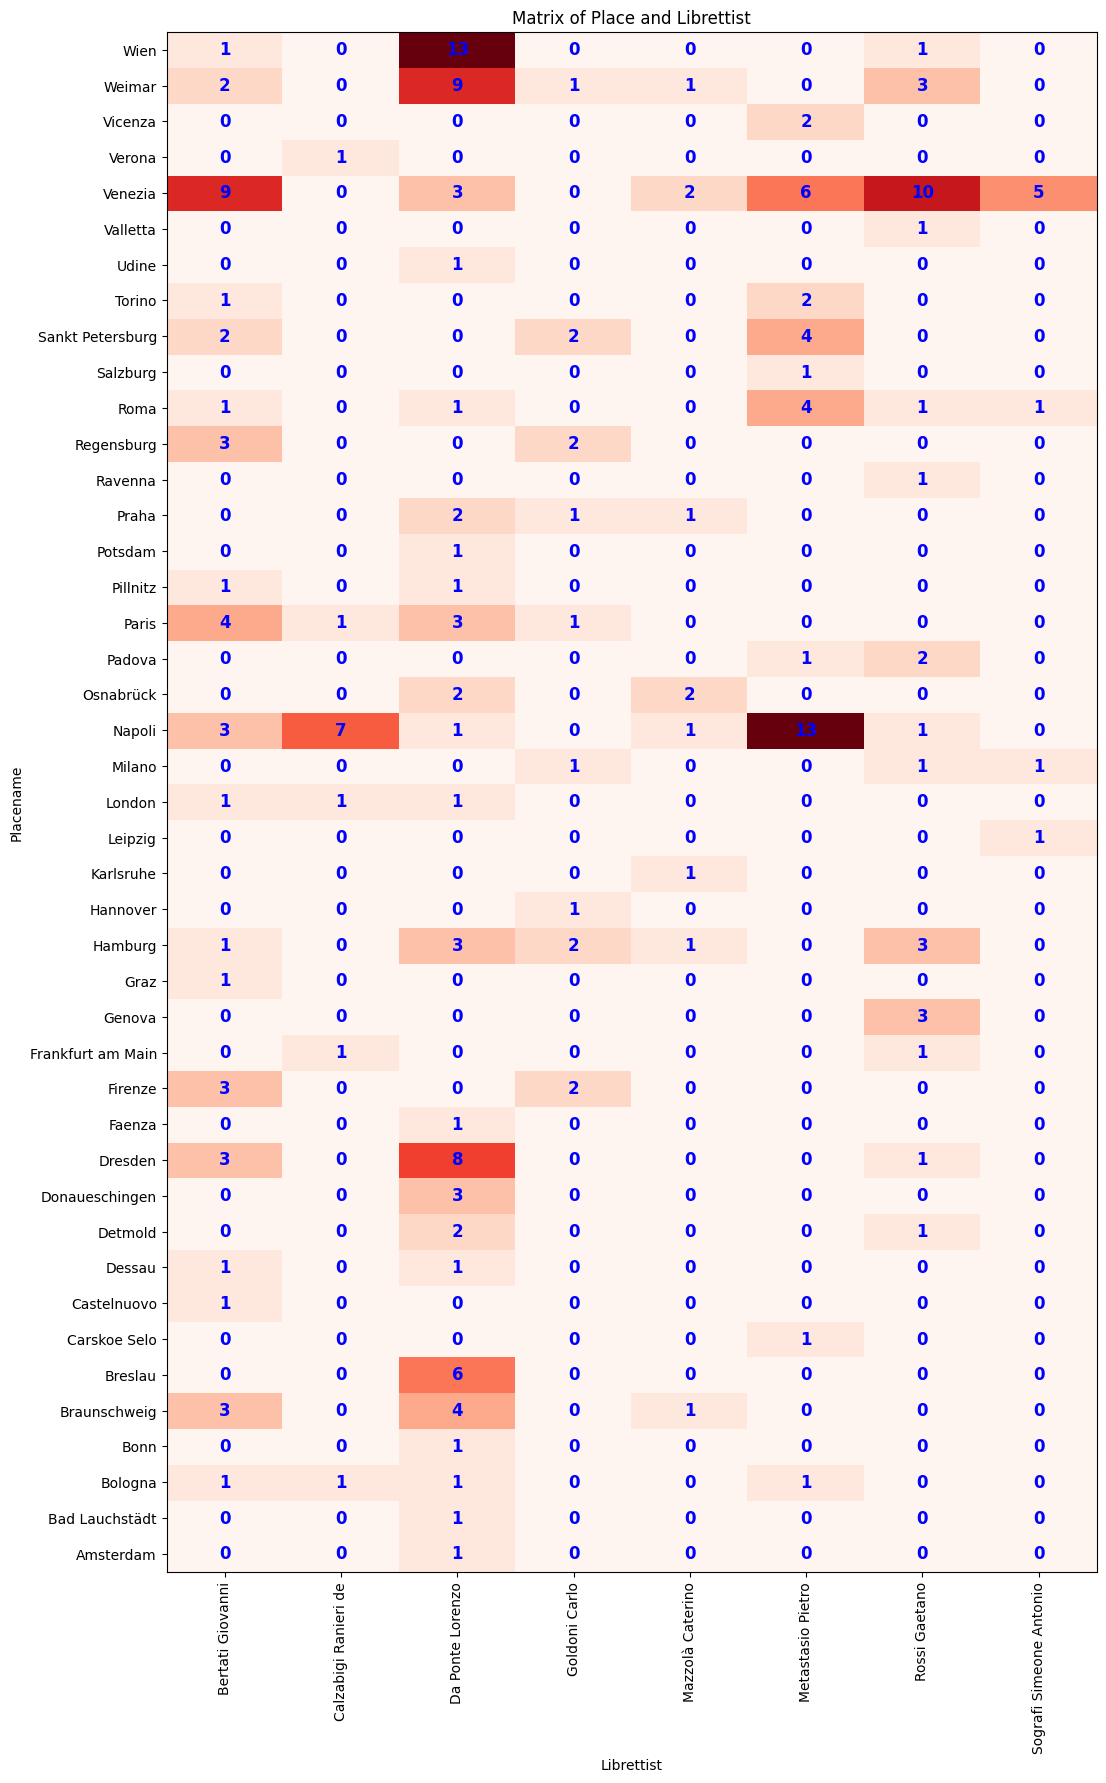

In [10]:
grouped_data = data.groupby(by=['placename','librettist'])
counts = grouped_data.size().reset_index(name='counts')
print(counts)
matrix = counts.pivot_table(values='counts', index='placename', columns='librettist', fill_value=0)
plt.figure(figsize=(12, 20))
plt.title("Matrix of Place and Librettist")
plt.xlabel("Librettist")
plt.ylabel("Placename")
plt.pcolor(matrix, cmap='Reds')
for y in range(matrix.shape[0]):
    for x in range(matrix.shape[1]):
        plt.text(x + 0.5, y + 0.5, matrix.iloc[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 fontweight='bold',
                 fontsize=12,
                 color='blue')

plt.yticks(np.arange(0.5, len(matrix.index), 1), matrix.index)
plt.xticks(np.arange(0.5, len(matrix.columns), 1), matrix.columns,rotation=90)
plt.show()

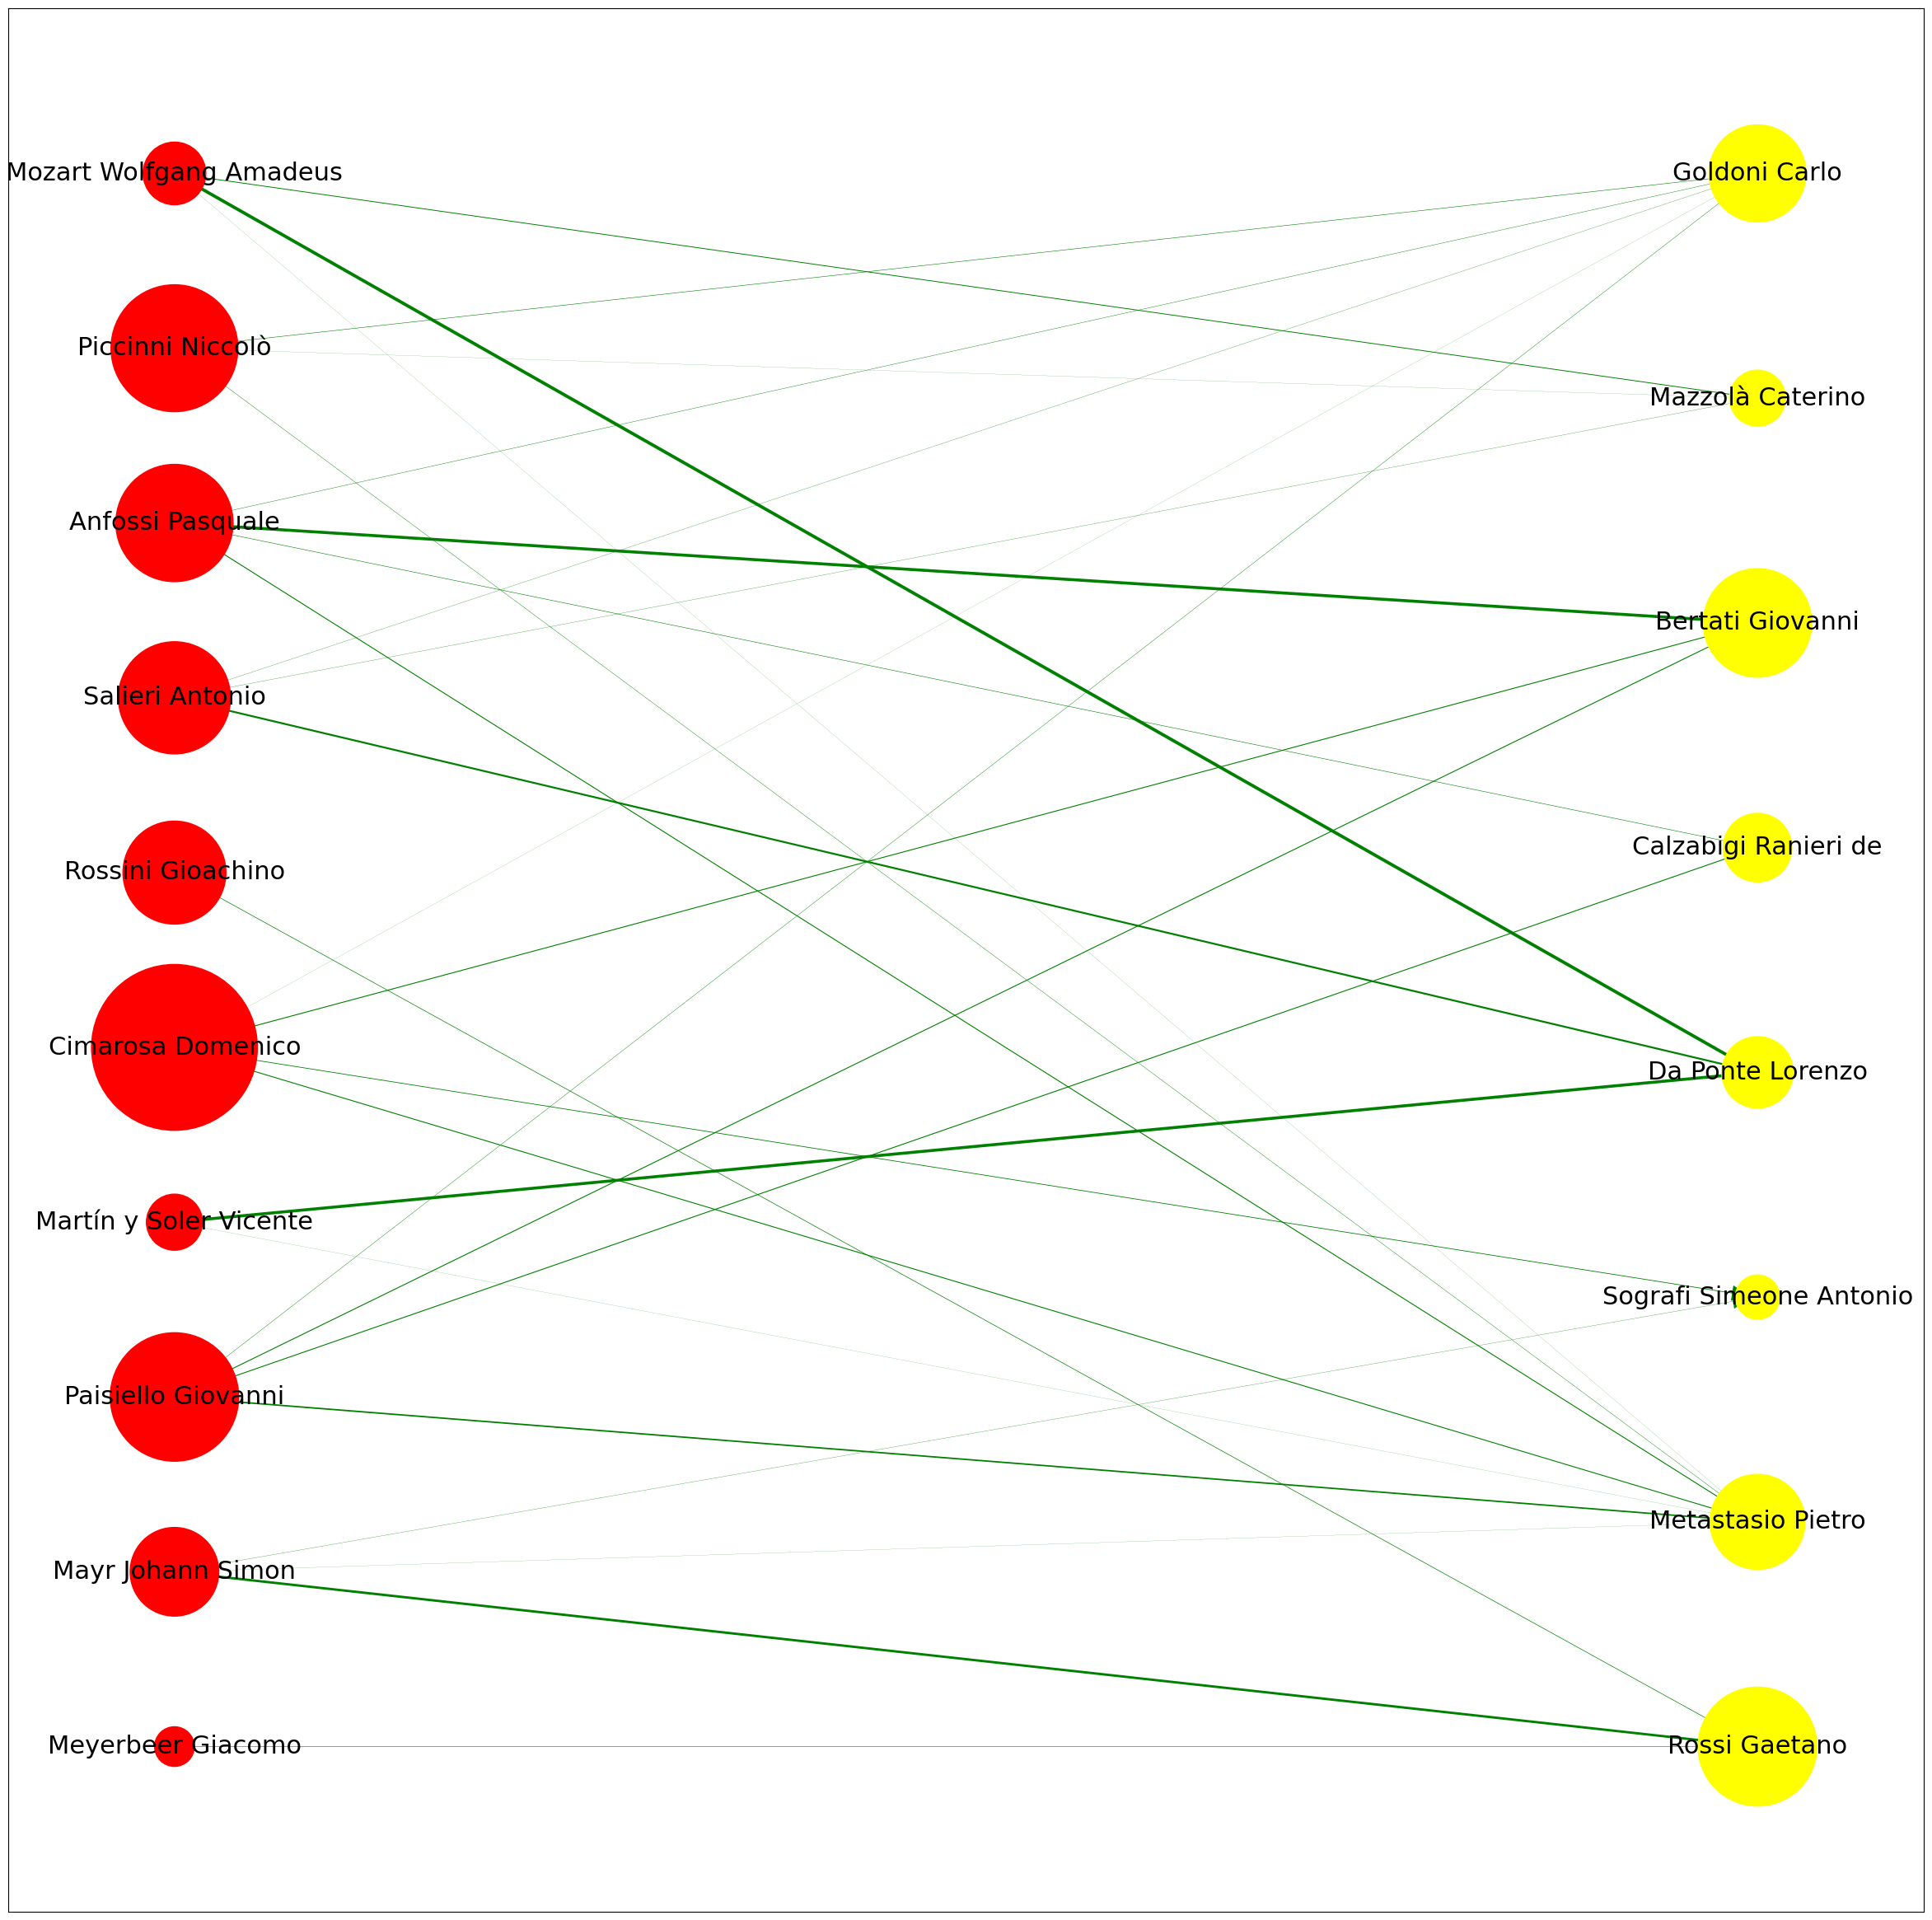

In [11]:
#bipartite graph
grouped_data = data.groupby(by=['librettist','composer'])
counts = grouped_data.size().reset_index(name='counts')
G = nx.DiGraph()

composer = data['composer']
librettist = data['librettist']
Edge = pd.DataFrame({"source":composer, "target":librettist})
for i, row in counts.iterrows():
    G.add_edge(row['composer'], row['librettist'], weight=row['counts'])
    
librettist_counts = Counter(data['librettist'])
composer_counts = Counter(data['composer'])

def scale_size(counts):
    return counts * 300 # or other scaling factor 

# Create lists of node sizes
librettist_sizes = list(map(scale_size, librettist_counts.values()))
composer_sizes = list(map(scale_size, composer_counts.values()))
node_sizes = librettist_sizes + composer_sizes

librettist_colors = {librettist: 'yellow' for librettist in data.librettist.unique()}
composer_colors = {composer: 'red' for composer in data.composer.unique()}
node_colors = [librettist_colors.get(node, composer_colors.get(node)) for node in G.nodes()]

plt.figure(figsize=(30, 30))
pos = bipartite_layout(G, composer)
nx.draw_networkx_edges(G, pos, width=[d['weight']/10 for (u, v, d) in G.edges(data=True)], edge_color='g', arrowsize=32)
labels = {node:node for node in G.nodes()}
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors)
nx.draw_networkx_labels(G, pos, labels, font_size = 22)
plt.show()

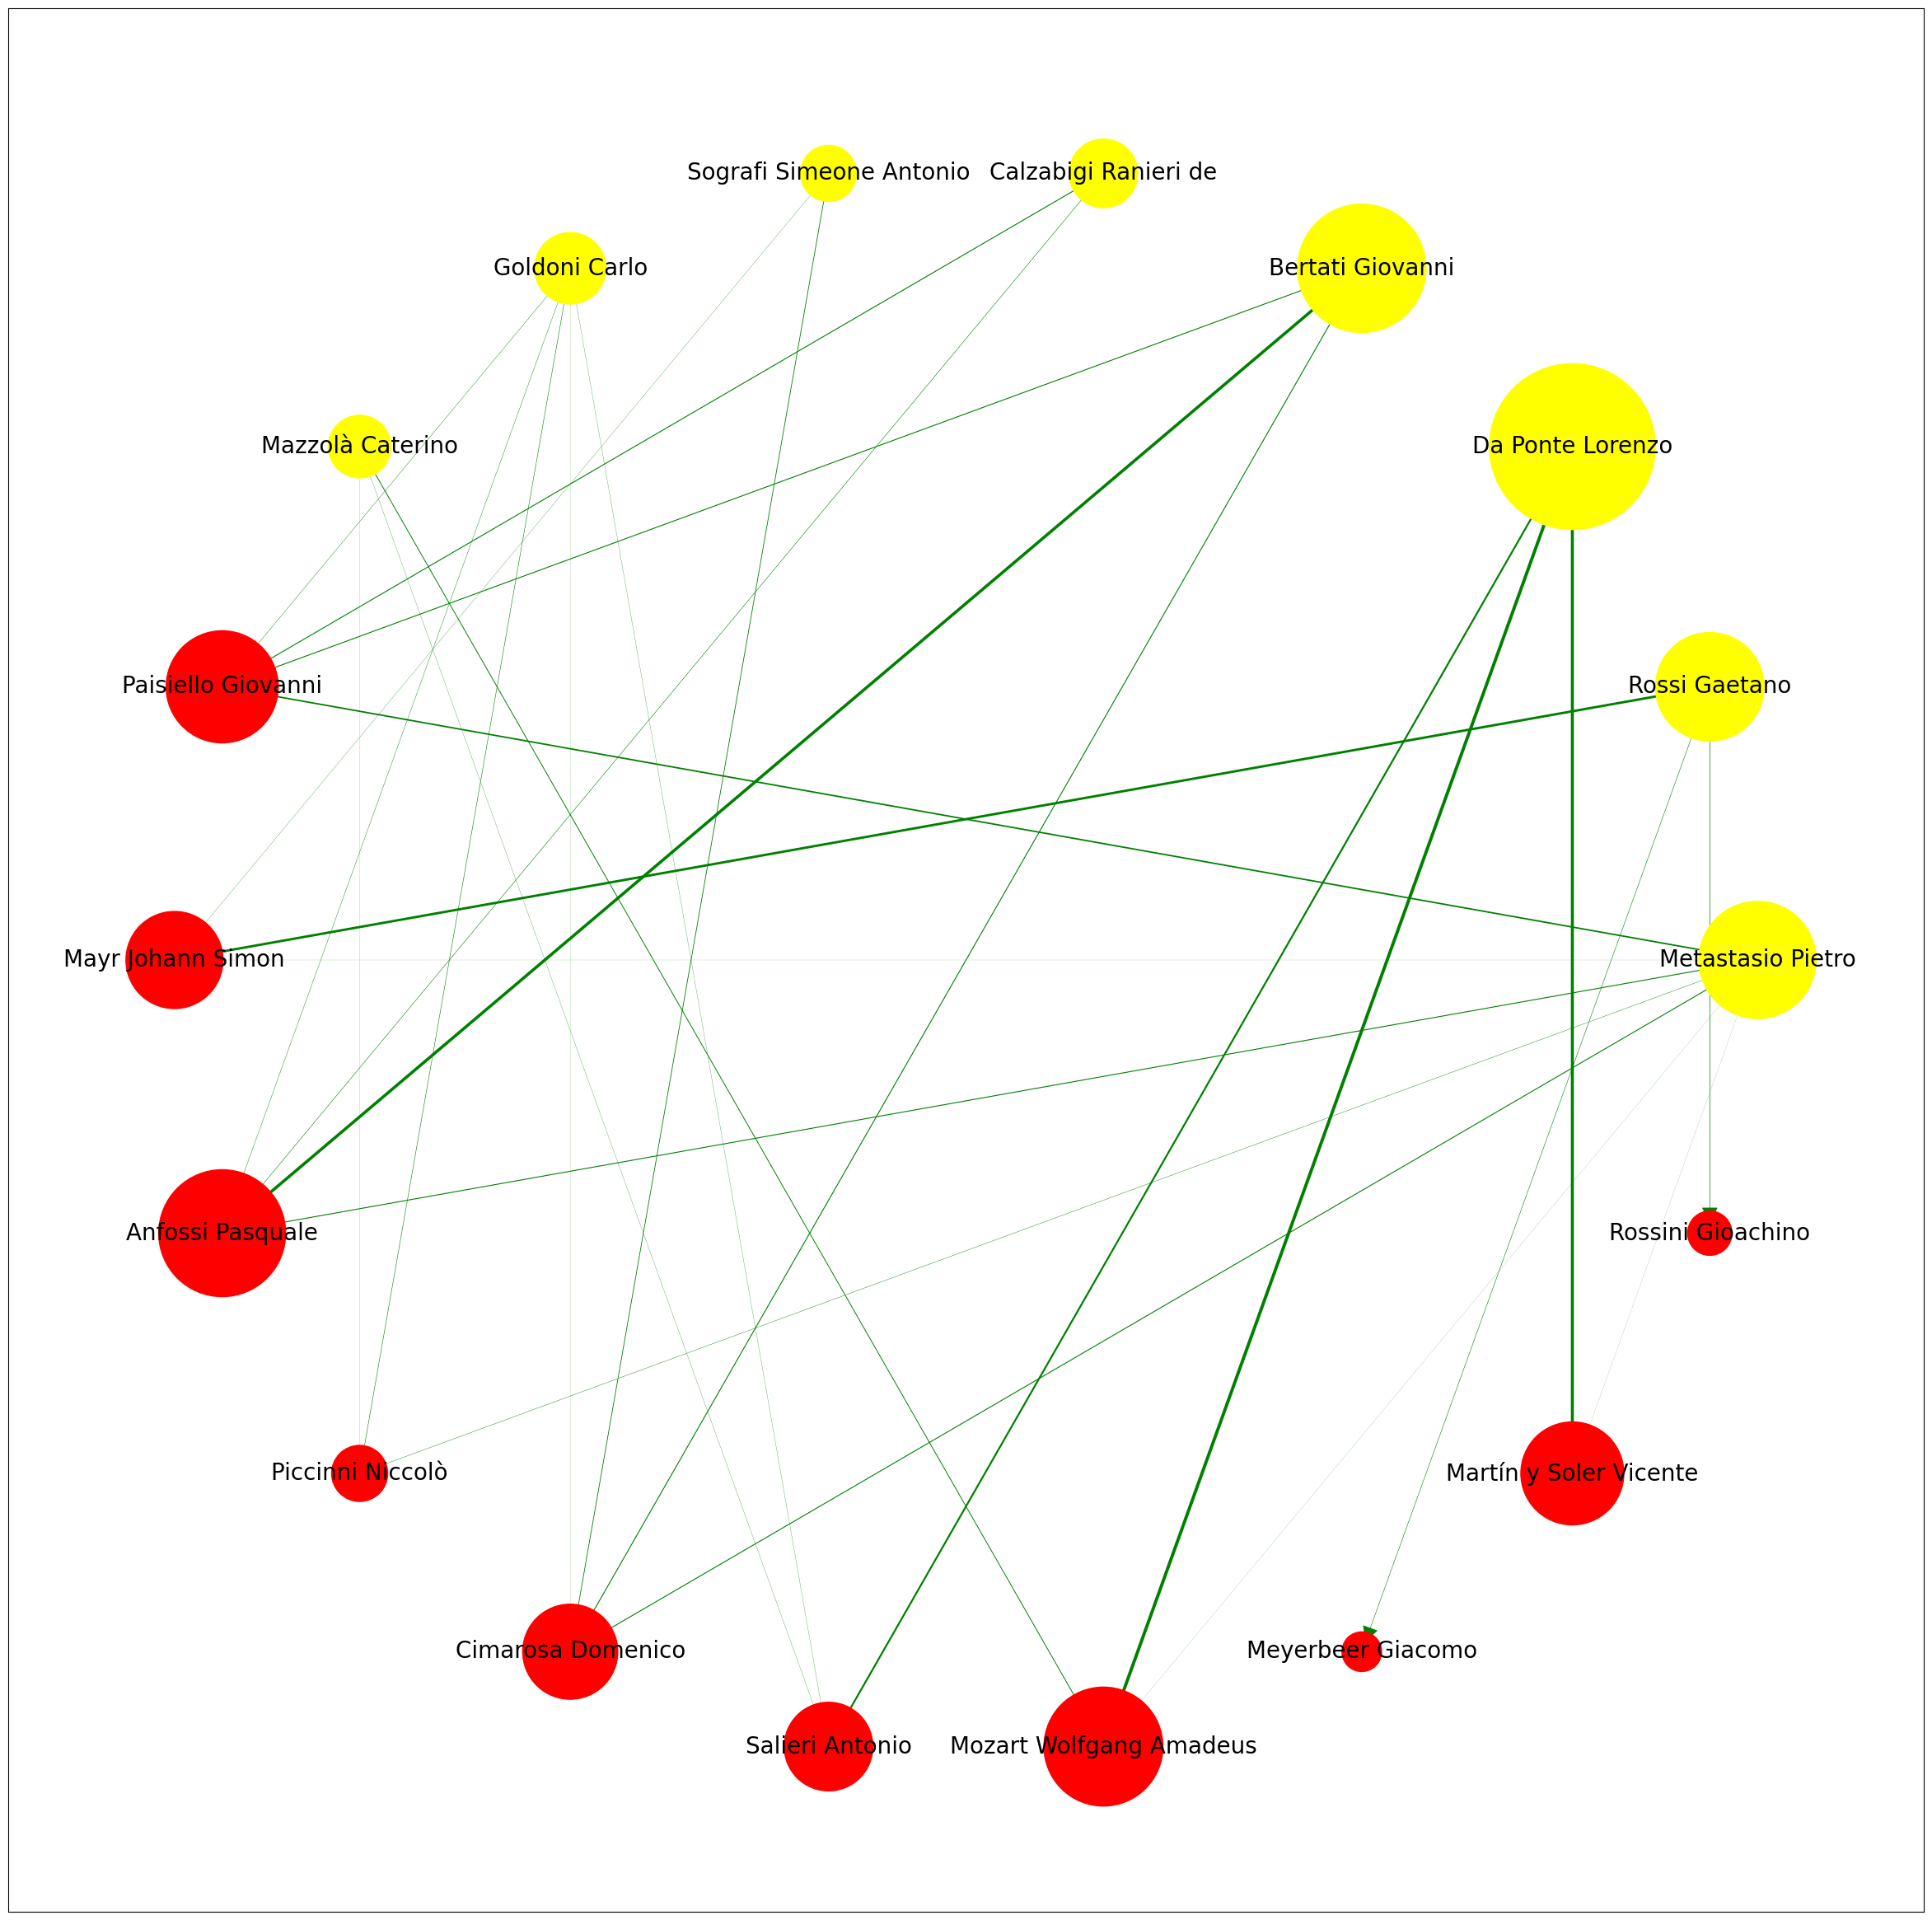

In [12]:
#Radial graph
grouped_data = data.groupby(by=['librettist','composer'])
counts = grouped_data.size().reset_index(name='counts')
G = nx.DiGraph()
G.add_nodes_from(data['librettist'], bipartite=0)
G.add_nodes_from(data['composer'], bipartite=1)
for i, row in counts.iterrows():
    G.add_edge(row['librettist'], row['composer'], weight=row['counts'])

node_weights = [data[data['librettist'] == node].shape[0] + data[data['composer'] == node].shape[0] for node in G.nodes()]
nx.set_node_attributes(G, values=dict(zip(G.nodes(), node_weights)), name='weight')

pos = nx.circular_layout(G)

librettist_colors = ['yellow']*len(data.librettist.unique())
composer_colors = ['red']*len(data.composer.unique())
node_colors = librettist_colors + composer_colors

# Create list of node sizes based on node weights
node_sizes = [d['weight'] * 300 for node, d in G.nodes(data=True)]

plt.figure(figsize=(30, 30))
nx.draw_networkx_edges(G, pos, width=[d['weight']/10 for (u, v, d) in G.edges(data=True)], edge_color='g', arrowsize=32)
labels = {node:node for node in G.nodes()}
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors)
nx.draw_networkx_labels(G, pos, labels, font_size = 20)
plt.show()


In [24]:
#Force directed using pyvis
G = nx.DiGraph()

for index, row in data.iterrows():
    G.add_node(row["librettist"],shape="triangle")
    G.add_node(row["composer"])
    if row["librettist"] != row["composer"]:
        G.add_weighted_edges_from([(row["librettist"], row["composer"], 1)])


n = Network(notebook=True)
n.from_nx(G)
options = {
    "physics": {
        "barnesHut": {
            "gravitationalConstant": -2000,
            "centralGravity": 0.3,
            "springLength": 150,
            "springConstant": 0.04,
            "damping": 0.09,
        },
        "maxVelocity": 146,
        "minVelocity": 1.5,
        "solver": "barnesHut",
        "timestep": 0.5,
        "arrows": {
            "to": {
                "enabled": True
            }
        }
    },
    "nodes": {
        "color": {
            "background": 'white'
        }
    }
}
n.set_options(json.dumps(options))
n.save_graph("graph.html")


Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [14]:
with open("graph.html", "r") as f:
    html = f.read()
    display(HTML(html))

In [27]:
G = nx.DiGraph()

for index, row in data.iterrows():
    G.add_node(row["librettist"],shape="triangle")
    G.add_node(row["composer"])
    G.add_node(row["title"],shape="star")
    if row["title"] != row["composer"]:
        G.add_weighted_edges_from([(row["title"], row["composer"], 1)])
    if row["title"] != row["librettist"]:
        G.add_weighted_edges_from([(row["title"], row["librettist"], 1)])
    if row["librettist"] != row["composer"]:
        G.add_weighted_edges_from([(row["librettist"], row["composer"], 1)])

n = Network(notebook=True)
n.from_nx(G)
options = {
    "physics": {
        "barnesHut": {
            "gravitationalConstant": -2000,
            "centralGravity": 0.3,
            "springLength": 150,
            "springConstant": 0.04,
            "damping": 0.09,
        },
        "maxVelocity": 146,
        "minVelocity": 1.5,
        "solver": "barnesHut",
        "timestep": 0.5,
        "arrows": {
            "to": {
                "enabled": True
            }
        }
    },
    "nodes": {
        "color": {
            "background": 'white'
        }
    }
}
n.set_options(json.dumps(options))
n.save_graph("grafo1.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [28]:
with open("grafo1.html", "r") as f:
    html = f.read()
    display(HTML(html))

In [22]:
#Force directed using pyvis
G = nx.DiGraph()

for index, row in data.iterrows():
    G.add_node(row["title"],shape="star")
    G.add_node(row["composer"])
    if row["title"] != row["composer"]:
        G.add_weighted_edges_from([(row["title"], row["composer"], 1)])


n = Network(notebook=True)
n.from_nx(G)
options = {
    "physics": {
        "barnesHut": {
            "gravitationalConstant": -2000,
            "centralGravity": 0.3,
            "springLength": 150,
            "springConstant": 0.04,
            "damping": 0.09,
        },
        "maxVelocity": 146,
        "minVelocity": 1.5,
        "solver": "barnesHut",
        "timestep": 0.5,
        "arrows": {
            "to": {
                "enabled": True
            }
        }
    },
    "nodes": {
        "color": {
            "background": 'white'
        }
    }
}
n.set_options(json.dumps(options))
n.save_graph("grafo.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [17]:
with open("grafo.html", "r") as f:
    html = f.read()
    display(HTML(html))

In [18]:
#insert geographical coordinates
geocoder = Nominatim(user_agent="my_app")

data["latitude"] = None
data["longitude"] = None

for index, row in data.iterrows():
    city = row["placename"]
    location = geocoder.geocode(city)
    data.at[index, "latitude"] = location.latitude
    data.at[index, "longitude"] = location.longitude
data.to_csv("opera.csv",index=False)

In [19]:
#open geojson file

with open('opera.geojson') as f:
    geo = geojson.load(f)

In [26]:
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import pandas as pd


# Crea una mappa centrata sulle coordinate comuni
m = folium.Map(location=[49, 10], zoom_start=3,min_zoom=3,no_wrap=True)


# Crea un layer di punti "cluster"
mc = MarkerCluster()

# Crea un dizionario per assegnare un colore a ogni compositore
colors = {
    'Metastasio, Pietro': 'purple',
    'Rossi, Gaetano': 'red',
    'Mazzolà, Caterino': 'pink',
    'Bertati, Giovanni': 'blue',
    'Goldoni, Carlo': 'green',
    'Da Ponte, Lorenzo': 'orange',
    'Sografi, Simeone Antonio': 'black',
    'Calzabigi, Ranieri de': 'white'
}

# Crea una funzione di formattazione per il contenuto del popup
def format_popup_content(feature):
  return f"""<h3>{feature['properties']['title']}</h3>
            <p><b>Compositore: </b>{feature['properties']['composer']}</p>
            <p><b>Librettista: </b>{feature['properties']['librettist']}</p>
            <p><b>Anno di rappresentazione: </b>{feature['properties']['performance_year']}</p>
            <p><b>Luogo: </b>{feature['properties']['placename']}</p>"""

# Crea un ciclo per aggiungere i marker alla mappa
for feature in geo['features']:
    composer = feature['properties']['librettist']
    color = colors.get(composer, 'black')
    icon = folium.Icon(color=color)
    mc.add_child(folium.Marker(location=feature['geometry']['coordinates'][::-1],
                                popup=format_popup_content(feature),
                                tooltip=feature['properties']['title'],
                                icon=icon))

# Aggiunto il layer di punti "cluster" alla mappa
m.add_child(mc)

# Aggiunta titolo
loc = 'Interactive map to display information about each performance'
title_html = '''
             <h2 align="center" style=" color: #000080; font-family: 'Helvetica Neue', sans-serif; font-size: 1; font-weight: bold; letter-spacing: -0.5px; line-height: 1; text-align: center"><b>{}</b></h2>
             '''.format(loc) 

m.get_root().html.add_child(folium.Element(title_html))

# visualizza la mappa
m


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5d0e5c8f-8726-47cc-be8d-15608be906a7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>